Readme goes here

```bash
# what have been channged?
git status
# add changed files
git add *
# commit
git commit -m "commit log goes here!"
# push
git push
```

```
# install seaborn
pip install seaborn
´´´


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Daten einlesen
data_training = pd.read_csv('./datasets/Data_Mining_Datasets/train_set.csv')
data_testing = pd.read_csv('./datasets/Data_Mining_Datasets/test_set.csv')

# Informationen über die Trainingsdaten anzeigen
print("\nBeschreibung der Trainingsdaten:")
print(data_training.head())  # Die ersten paar Zeilen der Trainingsdaten anzeigen
print("\nDatentypen der Trainingsdaten:")
print(data_training.dtypes)  # Datentypen der Spalten in den Trainingsdaten anzeigen

# Informationen über die Testdaten anzeigen
print("\nBeschreibung der Testdaten:")
print(data_testing.head())  # Die ersten paar Zeilen der Testdaten anzeigen
print("\nDatentypen der Testdaten:")
print(data_testing.dtypes)  # Datentypen der Spalten in den Testdaten anzeigen



Beschreibung der Trainingsdaten:
   index          Request_Date Flight_Date  Departure_hour   flight_unique_id  \
0      1  2019-06-03T11:00:00Z  2019-06-05              19  2019-06-05 FR 146   
1      2  2019-06-03T23:00:00Z  2019-06-05              19  2019-06-05 FR 146   
2      3  2019-06-04T11:00:00Z  2019-06-05              19  2019-06-05 FR 146   
3      4  2019-06-04T23:00:00Z  2019-06-05              19  2019-06-05 FR 146   
4      5  2019-06-03T11:00:00Z  2019-06-05              21  2019-06-05 FR 147   

  route_abb  Price_In_Eur  min_future_price_in_Eur  buy  
0   SXF-STN        208.07                   259.07    1  
1   SXF-STN        259.07                   259.07    1  
2   SXF-STN        259.07                   259.07    1  
3   SXF-STN        259.07                   259.07    1  
4   STN-SXF        143.86                   251.72    1  

Datentypen der Trainingsdaten:
index                        int64
Request_Date                object
Flight_Date                 o

In [4]:
# Form der Trainingsdaten anzeigen
train_shape = data_training.shape
print("Form der Trainingsdaten: {} Zeilen, {} Spalten".format(train_shape[0], train_shape[1]))

# Form der Testdaten anzeigen
test_shape = data_testing.shape
print("Form der Testdaten: {} Zeilen, {} Spalten".format(test_shape[0], test_shape[1]))

Form der Trainingsdaten: 83624 Zeilen, 9 Spalten
Form der Testdaten: 5583 Zeilen, 7 Spalten


In [14]:
# Überprüfen auf fehlende Daten im Trainingsdatensatz
print("\nFehlende Daten im Trainingsdatensatz:")
print(data_training.isnull().sum())  # Anzahl der fehlenden Werte pro Spalte im Trainingsdatensatz

# Überprüfen auf fehlende Daten im Testdatensatz
print("\nFehlende Daten im Testdatensatz:")
print(data_testing.isnull().sum())  # Anzahl der fehlenden Werte pro Spalte im Testdatensatz

# Überprüfen auf negative Werte in der Spalte "Price_In_Eur" im Trainingsdatensatz
negative_values_price_train = data_training[data_training['Price_In_Eur'] < 0]
print("\nNegative Werte in der Spalte 'Price_In_Eur' im Trainingsdatensatz:")
print(negative_values_price_train)

# Überprüfen auf negative Werte in der Spalte "Price_In_Eur" im Testdatensatz
negative_values_price_test = data_testing[data_testing['Price_In_Eur'] < 0]
print("\nNegative Werte in der Spalte 'Price_In_Eur' im Testdatensatz:")
print(negative_values_price_test)

# Überprüfen auf negative Werte in der Spalte "min_future_price_in_Eur" im Trainingsdatensatz
negative_values_min_future_price_train = data_training[data_training['min_future_price_in_Eur'] < 0]
print("\nNegative Werte in der Spalte 'min_future_price_in_Eur' im Trainingsdatensatz:")
print(negative_values_min_future_price_train)



Fehlende Daten im Trainingsdatensatz:
index                      0
Request_Date               0
Flight_Date                0
Departure_hour             0
flight_unique_id           0
route_abb                  0
Price_In_Eur               0
min_future_price_in_Eur    0
buy                        0
dtype: int64

Fehlende Daten im Testdatensatz:
index               0
Request_Date        0
Flight_Date         0
Departure_hour      0
flight_unique_id    0
route_abb           0
Price_In_Eur        0
dtype: int64

Negative Werte in der Spalte 'Price_In_Eur' im Trainingsdatensatz:
Empty DataFrame
Columns: [index, Request_Date, Flight_Date, Departure_hour, flight_unique_id, route_abb, Price_In_Eur, min_future_price_in_Eur, buy]
Index: []

Negative Werte in der Spalte 'Price_In_Eur' im Testdatensatz:
Empty DataFrame
Columns: [index, Request_Date, Flight_Date, Departure_hour, flight_unique_id, route_abb, Price_In_Eur]
Index: []

Negative Werte in der Spalte 'min_future_price_in_Eur' im Training

In [31]:
# Deskriptive Statistiken für den Trainingsdatensatz anzeigen
print("Deskriptive Statistiken für den Trainingsdatensatz:")
print(data_training[['Price_In_Eur', 'min_future_price_in_Eur']].describe())


Deskriptive Statistiken für den Trainingsdatensatz:
       Price_In_Eur  min_future_price_in_Eur
count  83624.000000             83624.000000
mean      71.965080                56.593014
std       54.788483                46.126909
min        8.990000                 8.990000
25%       32.770000                22.270000
50%       55.080000                41.890000
75%       91.790000                73.430000
max      372.960000               311.090000


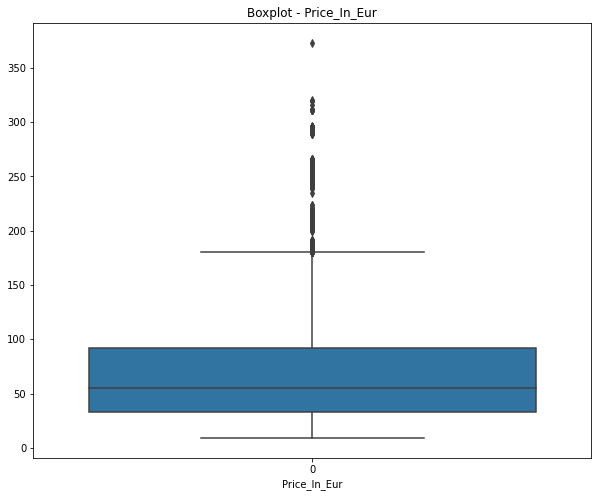

In [36]:
# Boxplot für das Feature "Price_In_Eur" in Trainingsdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_training['Price_In_Eur'])
plt.title('Boxplot - Price_In_Eur')
plt.xlabel('Price_In_Eur')
plt.show()


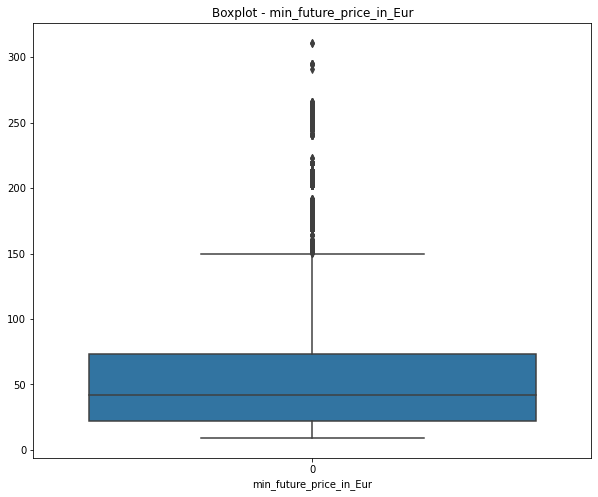

In [37]:
# Boxplot für das Feature "min_future_price_in_Eur" in Trainingsdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_training['min_future_price_in_Eur'])
plt.title('Boxplot - min_future_price_in_Eur')
plt.xlabel('min_future_price_in_Eur')
plt.show()


Korrelationen zwischen Merkmalen im Trainingsdatensatz:
                            index  Departure_hour  Price_In_Eur  \
index                    1.000000        0.002382     -0.388975   
Departure_hour           0.002382        1.000000      0.092180   
Price_In_Eur            -0.388975        0.092180      1.000000   
min_future_price_in_Eur -0.409284        0.083496      0.894554   
buy                     -0.121130       -0.000522     -0.038199   

                         min_future_price_in_Eur       buy  
index                                  -0.409284 -0.121130  
Departure_hour                          0.083496 -0.000522  
Price_In_Eur                            0.894554 -0.038199  
min_future_price_in_Eur                 1.000000  0.197882  
buy                                     0.197882  1.000000  


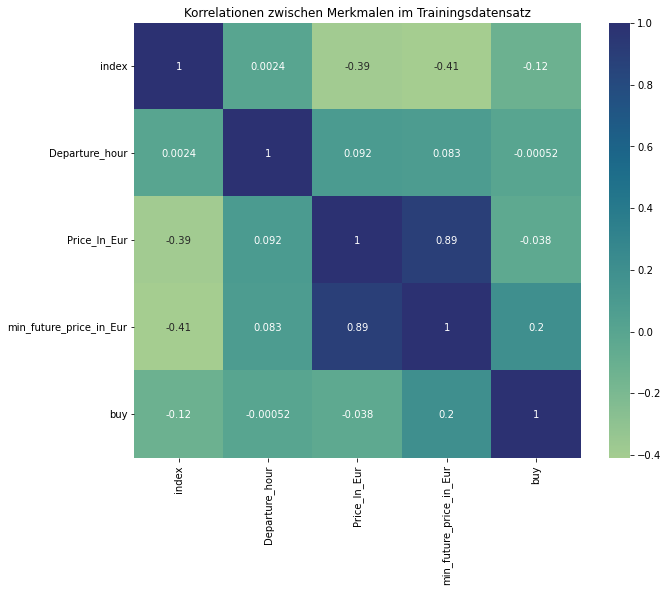

In [39]:
# Korrelationen zwischen Merkmalen im Trainingsdatensatz anzeigen
print("\nKorrelationen zwischen Merkmalen im Trainingsdatensatz:")
correlation_train = data_training.corr()
print(correlation_train)

# Korrelationsmatrix als Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_train, annot=True, cmap='crest')
plt.title('Korrelationen zwischen Merkmalen im Trainingsdatensatz')
plt.show()

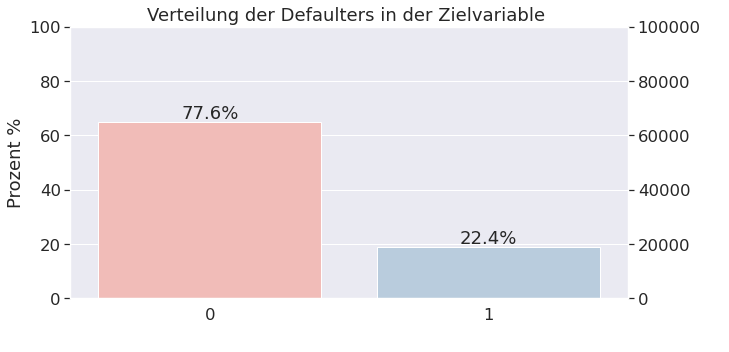

In [20]:
# Verteilung der Defaulters in der Zielvariable in Traningdatensatz

def default():
    ncount = len(data_training)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Prozent %')
    plt.title("Verteilung der Defaulters in der Zielvariable ")

    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

ax = sns.countplot(x=data_training.buy, palette="Pastel1")
sns.set(font_scale=1.5)
ax.set_ylim(top=100000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=100000)

default()

plt.show()


In [18]:
# Deskriptive Statistiken für den Testdatensatz anzeigen
print("\nDeskriptive Statistiken für den Testdatensatz:")
print(data_testing['Price_In_Eur'].describe())


Deskriptive Statistiken für den Testdatensatz:
count    5583.000000
mean       93.630210
std        64.511597
min         9.990000
25%        44.500000
50%        73.430000
75%       126.470000
max       295.890000
Name: Price_In_Eur, dtype: float64


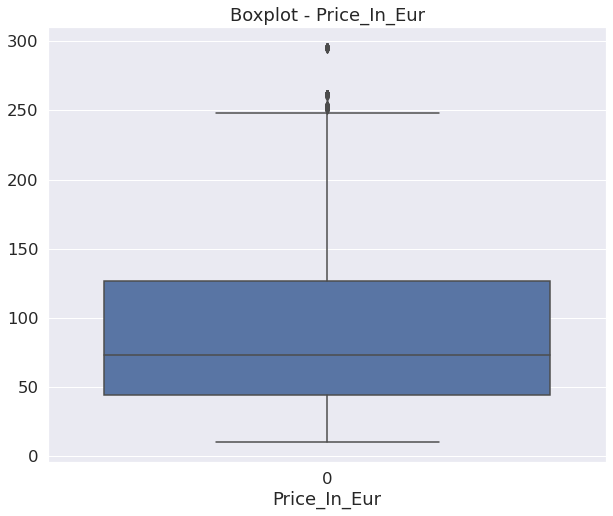

In [16]:
# Boxplot für das Feature "Price_In_Eur" in Testdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_testing['Price_In_Eur'])
plt.title('Boxplot - Price_In_Eur')
plt.xlabel('Price_In_Eur')
plt.show()


Korrelationen zwischen Merkmalen im Testdatensatz:
                   index  Departure_hour  Price_In_Eur
index           1.000000       -0.007409     -0.068543
Departure_hour -0.007409        1.000000      0.000955
Price_In_Eur   -0.068543        0.000955      1.000000


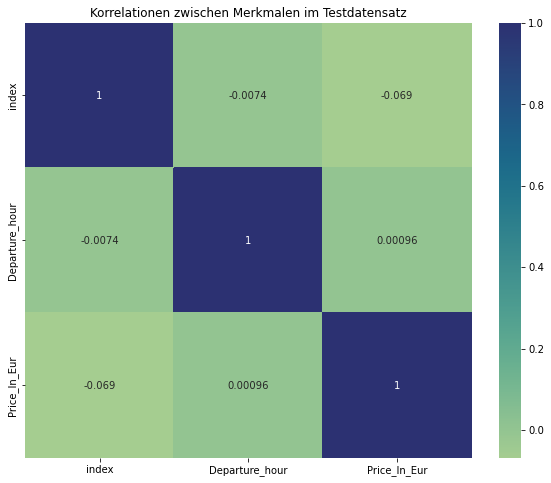

In [41]:

# Korrelationen zwischen Merkmalen im Testdatensatz anzeigen
print("\nKorrelationen zwischen Merkmalen im Testdatensatz:")
correlation_test = data_testing.corr()
print(correlation_test)

# Korrelationsmatrix als Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_test, annot=True, cmap='crest')
plt.title('Korrelationen zwischen Merkmalen im Testdatensatz')
plt.show()


Für das Projekt "Kaufen oder Warten" sind folgende Merkmale (Features) relevant:

- Request_Date: Datum/Zeit der Preisanfrage
- Flight_Date: Datum des Flugs
- Departure_hour: Gerundete Abflugszeit
- flight_unique_id: Eindeutige ID für den Flug
- route_abb: Abkürzung der Route (London Stansted - Berlin Schönefeld oder London Stansted - Frankfurt)
- Price_In_Eur: Flugpreis
- min_future_price_in_Eur: Minimaler Flugpreis für die flight_unique_id über alle zukünftigen Request_Dates (kann als zusätzliches Merkmal betrachtet werden)

Basierend auf diesen vorhandenen Merkmalen können weitere abgeleitete Merkmale definiert werden:

- Time_Until_Flight: Zeitdauer bis zum Flug in Tagen (berechnet als Flight_Date - Request_Date)
- Day_of_Week: Wochentag des Flugs (Montag bis Sonntag)
- Month: Monat des Flugs (Januar bis Dezember)
- Year: Jahr des Flugs


Zusätzlich zu den vorhandenen Merkmalen können externe Informationen berücksichtigt werden, um weitere relevante Merkmale abzuleiten:

- Feiertage: Ein binäres Merkmal, das angibt, ob der Flug an einem Feiertag stattfindet.
- Saison: Ein Merkmal, das die Saison des Jahres (Frühling, Sommer, Herbst, Winter) basierend auf dem Flugdatum angibt.
- Wetterbedingungen: Informationen über das Wetter an den Abflug- und Ankunftsorten können als Merkmale einbezogen werden, um potenzielle Auswirkungen auf die Flugpreise zu berücksichtigen.

Diese zusätzlichen Merkmale könnten helfen, Muster und Zusammenhänge zwischen den Flugpreisen und verschiedenen Faktoren wie Datum, Uhrzeit, Strecke und externen Einflüssen zu identifizieren.
